# Unsupervised Analysis of Days of Week

Treating crossings each day as feature to learn about relationship between various days . 


In [1]:
from jupyterworkflow.data import get_fremont_data
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


## Get Data

In [2]:
data = get_fremont_data()

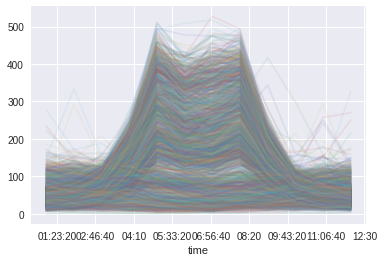

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.1) # alpha => Transparency

In [4]:
pivoted.index

Index([01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00, 07:00:00,
       08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00],
      dtype='object')

In [5]:
np.unique(data.index.time)

array([datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0),
       datetime.time(4, 0), datetime.time(5, 0), datetime.time(6, 0),
       datetime.time(7, 0), datetime.time(8, 0), datetime.time(9, 0),
       datetime.time(10, 0), datetime.time(11, 0), datetime.time(12, 0)],
      dtype=object)

## PCA

In [6]:
X = pivoted.fillna(0).T.values

X2 = PCA(2, svd_solver='full').fit_transform(X)

In [7]:
X2.shape

(2189, 2)

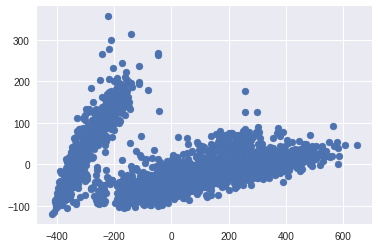

In [8]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised clustering

In [9]:
gmm = GaussianMixture(2).fit(X2)
labels=gmm.predict(X2)

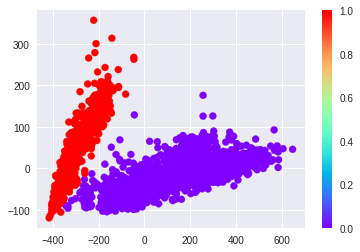

In [10]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Red Cluster')

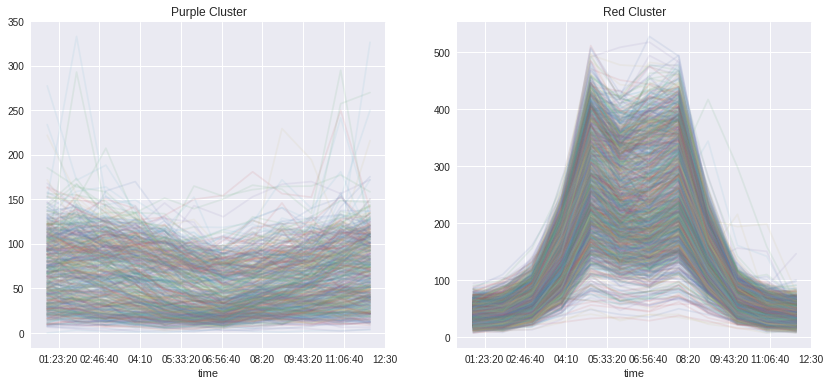

In [11]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[1])
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Day of Week

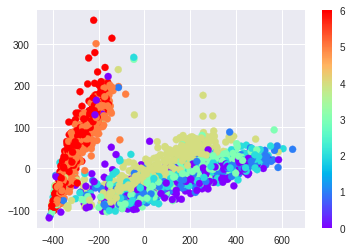

In [12]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [13]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-09-21, 2018-09-22, 2018-09-23, 2018-09-24, 2018-09-25, 2018-09-26,
       2018-09-27, 2018-09-28, 2018-09-29, 2018-09-30],
      dtype='object', length=2189)

## Analyzing Outliers

The foloowing points are weekdays with a holiday-like pattern

In [15]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels== 0)& (dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', length=1510, freq=None)

What's up with February 6th 2017 ?  Seattle had a storm. 
